# **Importing all the necessary libraries required for processing.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score,accuracy_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import k_means



In [ ]:
#Increasing the visualization size
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

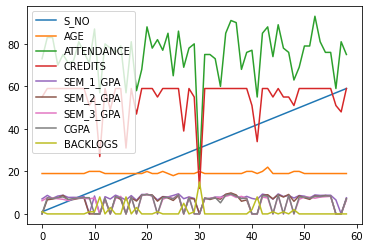

In [ ]:
#Reading the dataset
data=pd.read_csv('/content/report.csv')
data.plot()
plt.show()



In [ ]:
#Creating a duplicate copy for a dataset
data_dup=data.copy()

In [ ]:
data.shape

(59, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   S_NO        59 non-null     int64  
 1   ROLL_NO     59 non-null     object 
 2   NAME        59 non-null     object 
 3   BRANCH      59 non-null     object 
 4   GENDER      59 non-null     object 
 5   AGE         59 non-null     int64  
 6   ADDRESS     59 non-null     object 
 7   ATTENDANCE  59 non-null     int64  
 8   CREDITS     59 non-null     int64  
 9   SEM_1_GPA   59 non-null     float64
 10  SEM_2_GPA   59 non-null     float64
 11  SEM_3_GPA   59 non-null     float64
 12  CGPA        59 non-null     float64
 13  BACKLOGS    59 non-null     int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 6.6+ KB


In [ ]:
data.dtypes

S_NO            int64
ROLL_NO        object
NAME           object
BRANCH         object
GENDER         object
AGE             int64
ADDRESS        object
ATTENDANCE      int64
CREDITS         int64
SEM_1_GPA     float64
SEM_2_GPA     float64
SEM_3_GPA     float64
CGPA          float64
BACKLOGS        int64
dtype: object

In [ ]:
data.corr()# Finding if there is multi-collineariry between the features

,S_NO,AGE,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
S_NO,1.000000,0.086169,0.048948,0.037795,0.067926,0.150084,-0.094542,0.000640,-0.079478
AGE,0.086169,1.000000,-0.017034,-0.180490,-0.186822,-0.112399,-0.056910,-0.057188,0.180016
ATTENDANCE,0.048948,-0.017034,1.000000,0.750403,0.545637,0.508790,0.503548,0.475407,-0.755413
CREDITS,0.037795,-0.180490,0.750403,1.000000,0.705983,0.720414,0.699137,0.665398,-0.972684
SEM_1_GPA,0.067926,-0.186822,0.545637,0.705983,1.000000,0.687092,0.536786,0.511186,-0.593969
SEM_2_GPA,0.150084,-0.112399,0.508790,0.720414,0.687092,1.000000,0.661650,0.770449,-0.627265
SEM_3_GPA,-0.094542,-0.056910,0.503548,0.699137,0.536786,0.661650,1.000000,0.926452,-0.620511
CGPA,0.000640,-0.057188,0.475407,0.665398,0.511186,0.770449,0.926452,1.000000,-0.591778
BACKLOGS,-0.079478,0.180016,-0.755413,-0.972684,-0.593969,-0.627265,-0.620511,-0.591778,1.000000


In [ ]:
data.describe()#Obtaining statistical data for making the data clean.

,S_NO,AGE,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,19.220339,75.101695,54.847458,7.515085,6.117458,5.723729,5.608644,1.033898
std,17.175564,0.559180,11.443557,9.056934,2.196054,3.249851,3.423295,3.656738,2.665010
min,1.000000,18.000000,21.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,19.000000,71.000000,55.000000,7.290000,6.025000,3.110000,0.000000,0.000000
50%,30.000000,19.000000,76.000000,59.000000,8.000000,7.080000,7.390000,7.470000,0.000000
75%,44.500000,19.000000,81.000000,59.000000,8.710000,8.380000,7.910000,8.110000,1.000000
max,59.000000,22.000000,93.000000,59.000000,9.470000,9.870000,9.300000,9.370000,15.000000


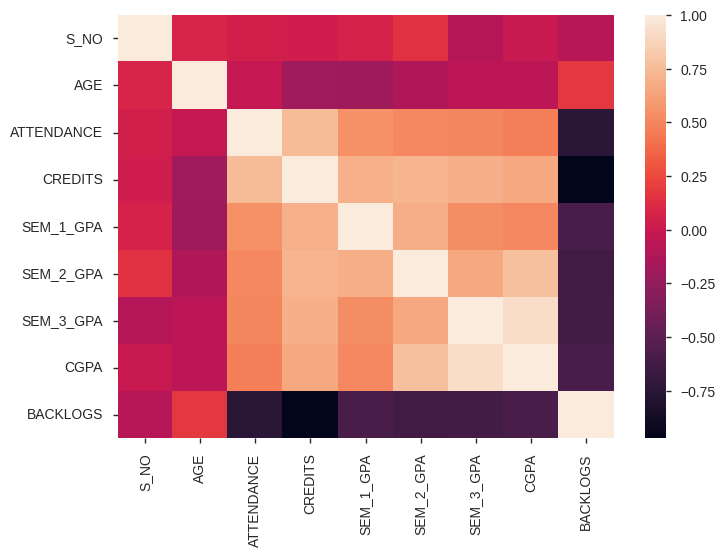

In [ ]:
sns.heatmap(data.corr())

# **Data Visualization using matplotlib,seaborn,plotly**

Getting to know the data through visualisation

Text(0.5, 1.0, 'Gender of the students')

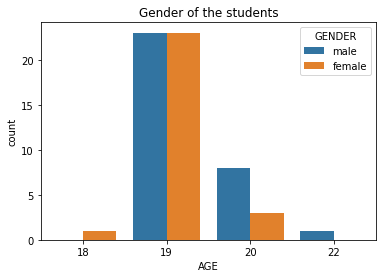

In [ ]:
sns.countplot(x=data['AGE'],hue=data['GENDER'])# Checking the gender of the students through the age
plt.title('Gender of the students')

Text(0.5, 1.0, 'location of students')

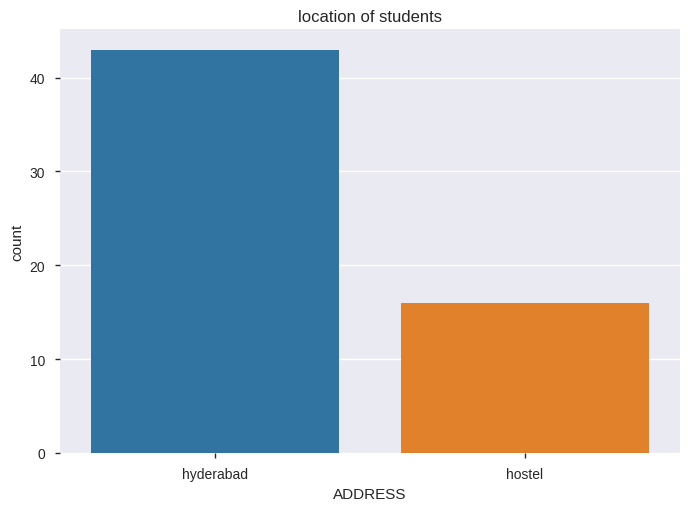

In [ ]:
sns.countplot(x=data['ADDRESS'])# Location of the students
plt.title('location of students')


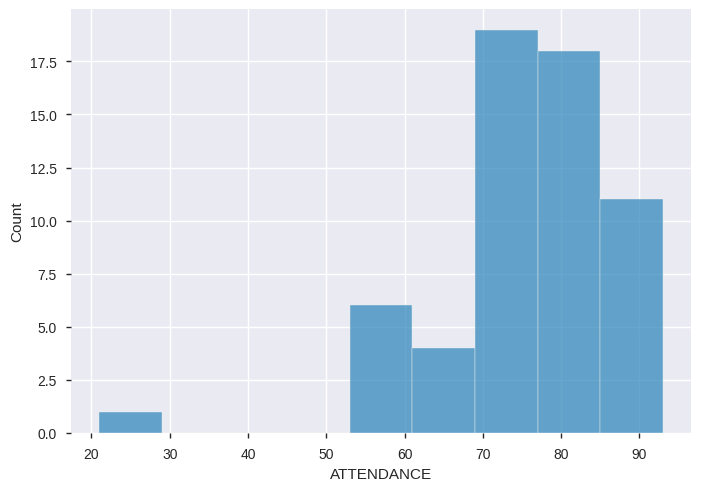

In [ ]:
#Checking the regularity of the students
sns.histplot(x=data['ATTENDANCE'],bins=9)

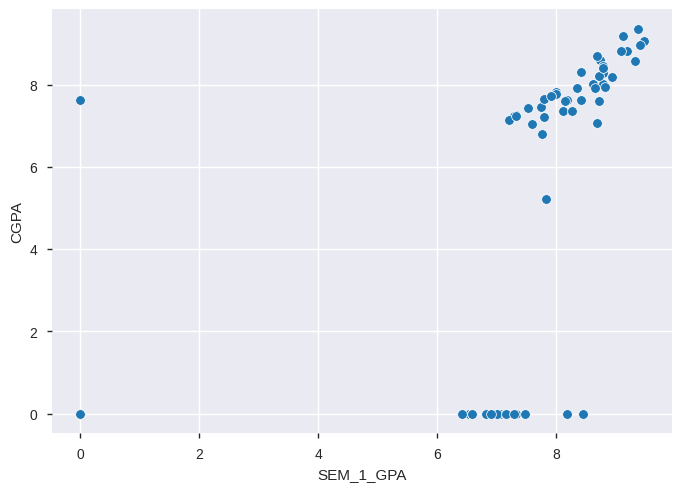

In [ ]:
#Finding the relation between the sem1 gpa and cgpa of the students using scatter plot
sns.scatterplot(x=data['SEM_1_GPA'],y=data['CGPA'])

# Bindu vasuki row has error, should remove cgpa and make it 0

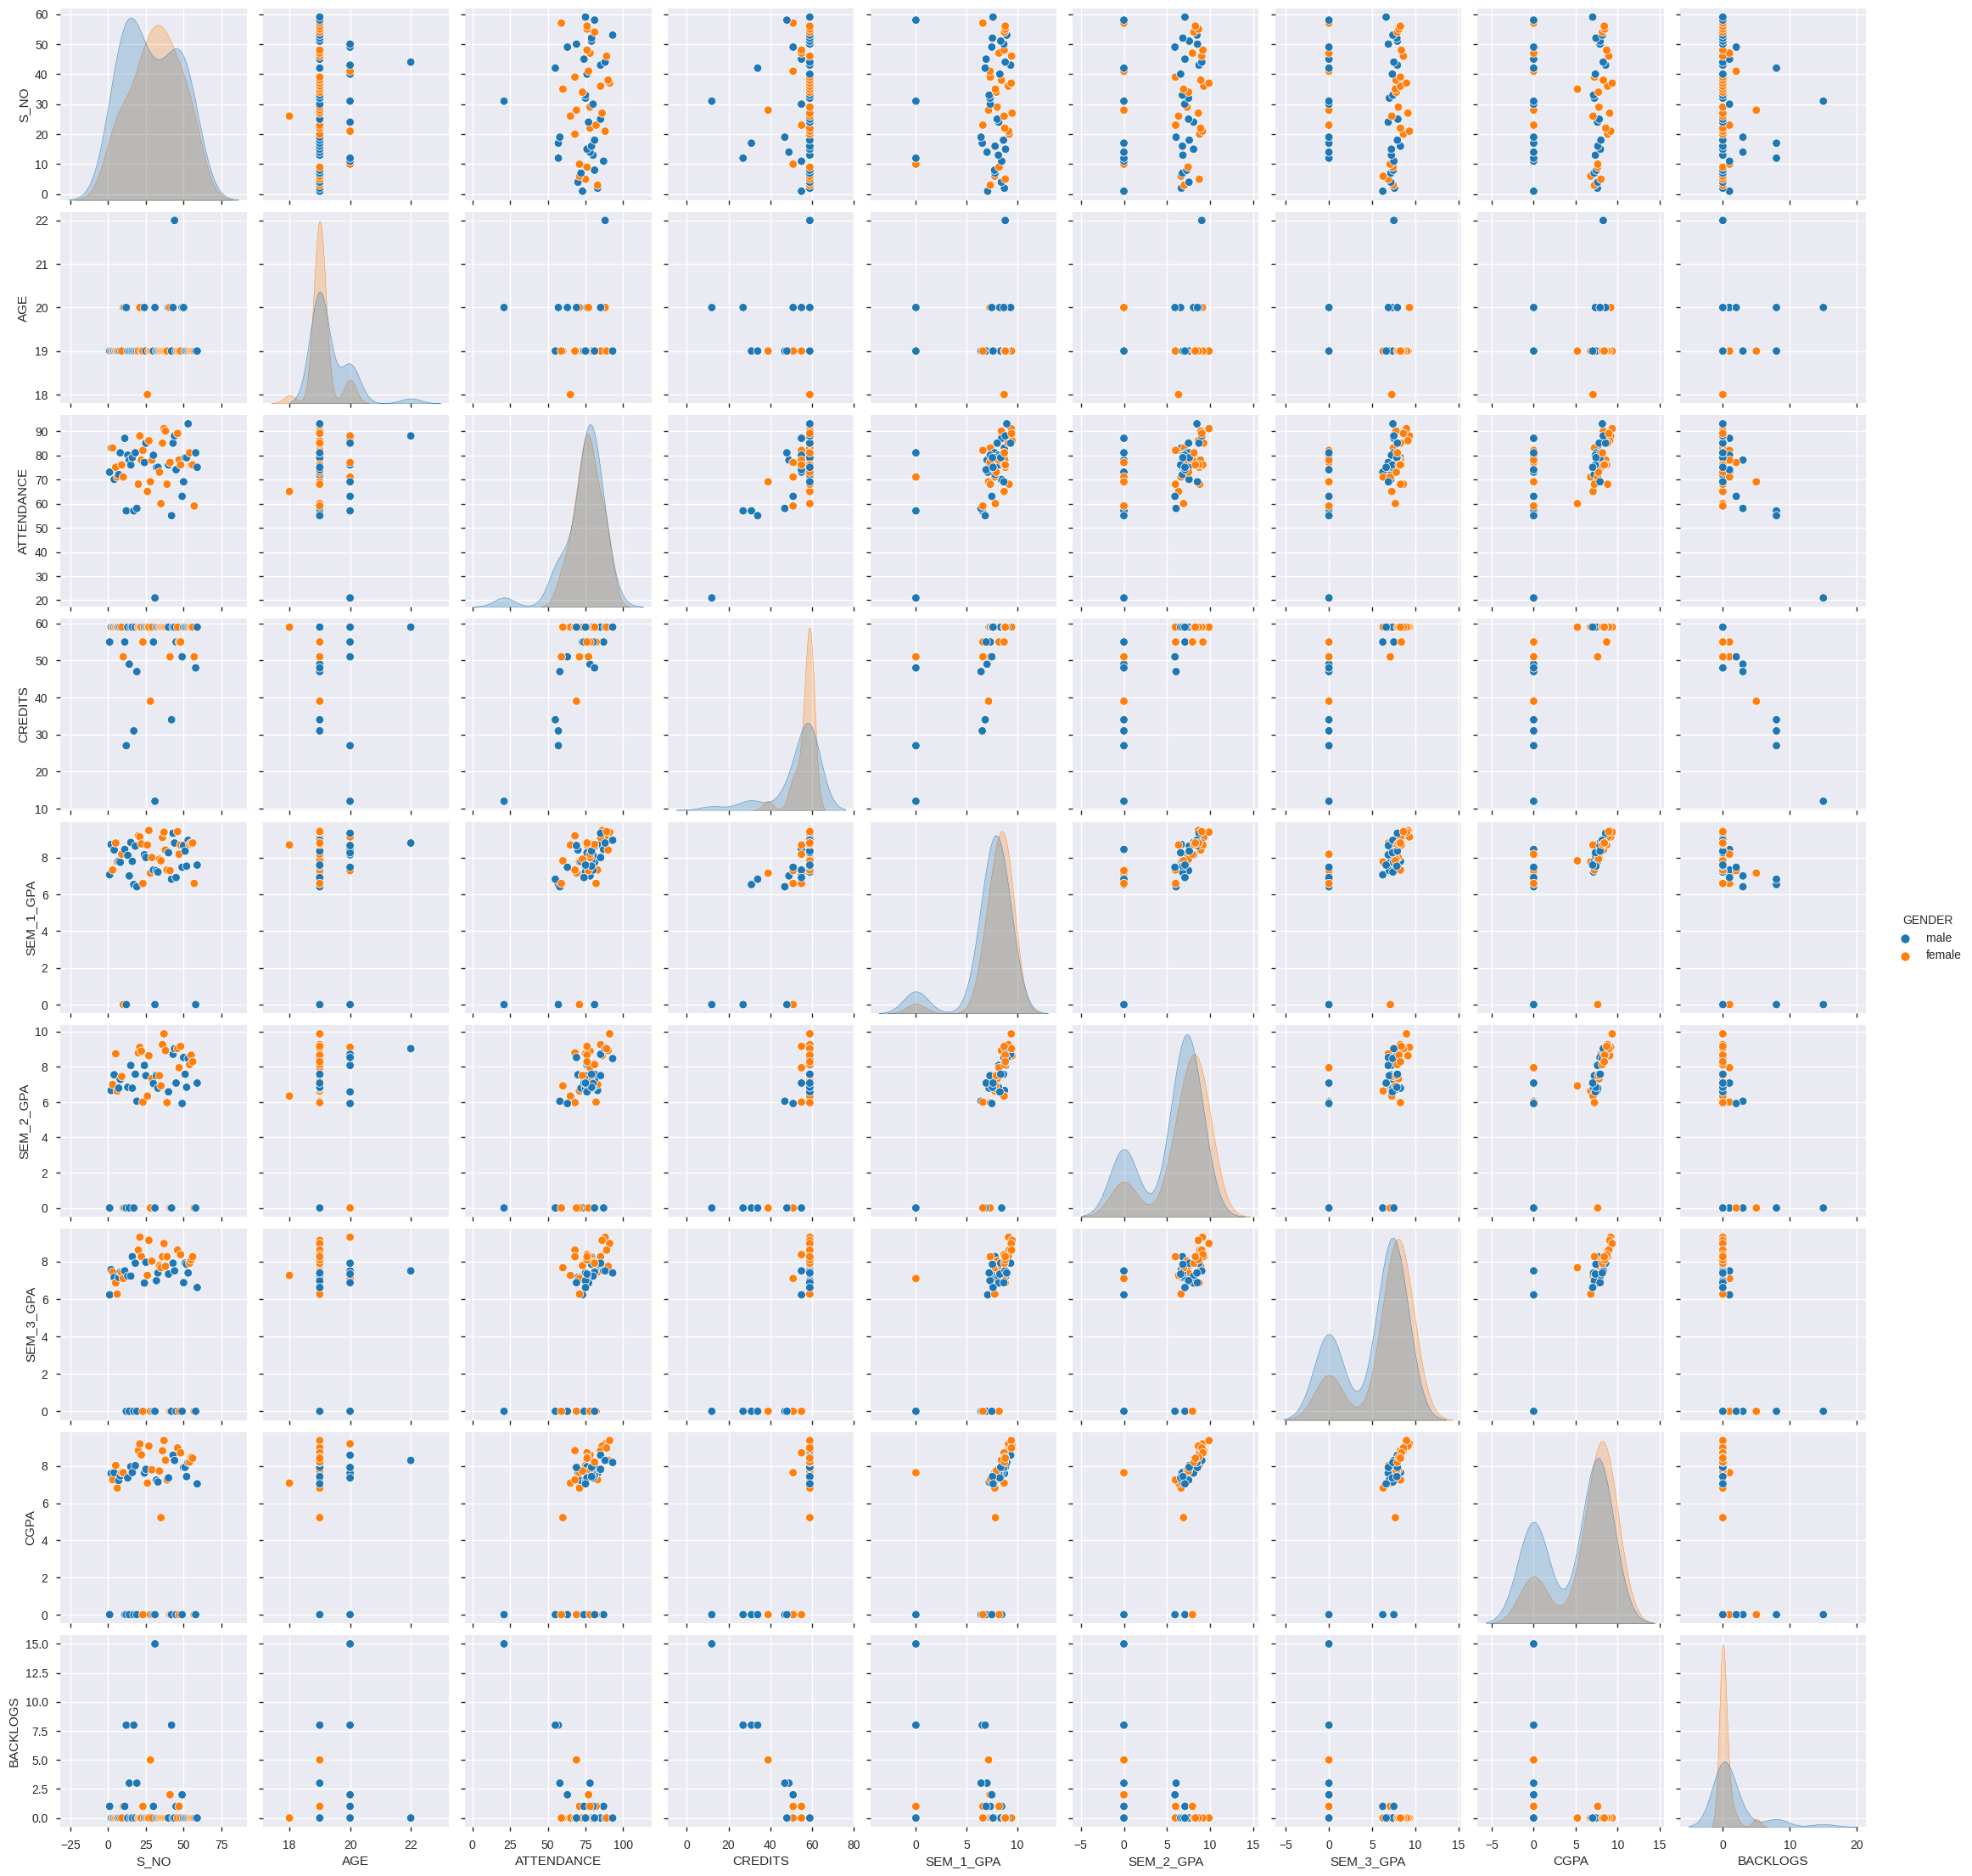

In [ ]:
#Finding the relation between all the features using pairplot through the gender of the students
sns.pairplot(data,hue='GENDER')


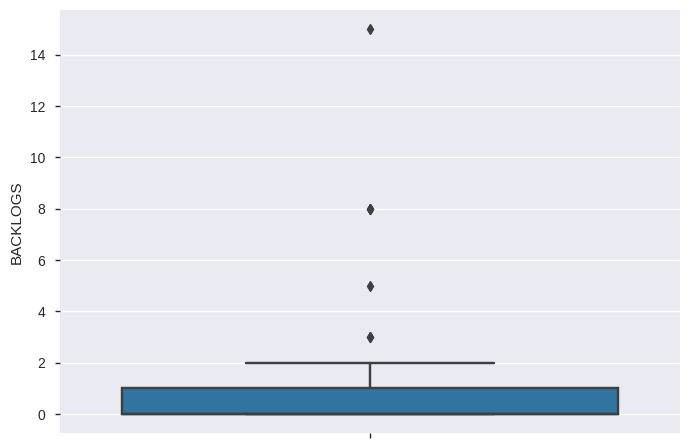

In [ ]:
#Checking the outliers in the data using boxplot
sns.boxplot(y=data['BACKLOGS'])

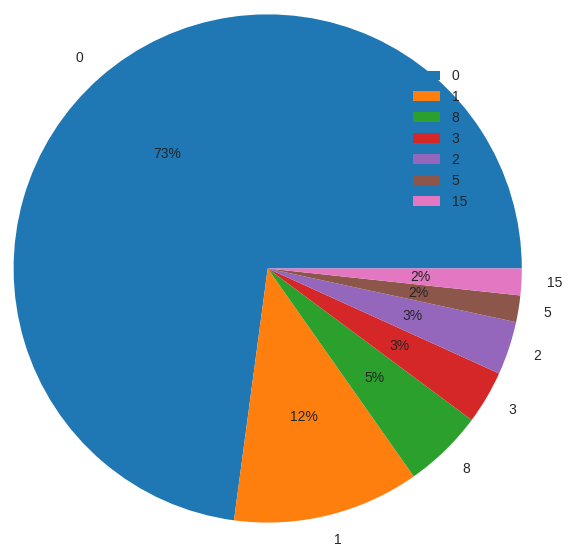

In [ ]:
#Number of students having backlogs is represented using pie()
plt.pie(data['BACKLOGS'].value_counts(),labels=data['BACKLOGS'].value_counts().keys(),autopct='%1.0f%%',radius=1.5)
plt.legend()
plt.show()

For better visualisations, we use plotly

In [ ]:
#Address of the students
fig=px.histogram(x=data['ADDRESS'],nbins=10,color=data['GENDER'])
fig.show()

In [ ]:
#Checking the relation between sem2,sem3,cgpa relation through scatter_3d plot
fig1=px.scatter_3d(x=data['SEM_2_GPA'],y=data['SEM_3_GPA'],z=data['CGPA'],color=data['GENDER'])
fig1.show()

# **Performing Exploratory Data Analysis**

In [ ]:
data_add_gen=data.groupby('ADDRESS')['GENDER'].value_counts()#Checking the number of students are male and female through their address
data_add_gen

ADDRESS    GENDER
hostel     female     9
           male       7
hyderabad  male      25
           female    18
Name: GENDER, dtype: int64

In [ ]:
# checking co-relation for hostel and days scholar students with cgpa
data_location=pd.DataFrame()
data_location['location']=data['ADDRESS']
data_location['cgpa']=data['CGPA']
data_location

,location,cgpa
0,hyderabad,0.00
1,hyderabad,7.60
2,hyderabad,7.26
3,hostel,7.64
4,hyderabad,8.03
5,hyderabad,6.81
6,hyderabad,7.22
7,hyderabad,7.47
8,hostel,7.64
9,hostel,7.64


In [ ]:
#Finding number of students are hyderabad and hostel using get_dummies()
data_location=pd.get_dummies(data_location)
data_location

,cgpa,location_hostel,location_hyderabad
0,0.00,0,1
1,7.60,0,1
2,7.26,0,1
3,7.64,1,0
4,8.03,0,1
5,6.81,0,1
6,7.22,0,1
7,7.47,0,1
8,7.64,1,0
9,7.64,1,0


In [ ]:
#Finding relation between address and cgpa
data1.corr()

,cgpa,location_hostel,location_hyderabad
cgpa,1.000000,0.177833,-0.177833
location_hostel,0.177833,1.000000,-1.000000
location_hyderabad,-0.177833,-1.000000,1.000000


In [ ]:
#Checking which students fall under the category of more than the average
data_avg=data[data['CGPA']>0.00]
data_avg.shape

(42, 14)

In [ ]:
#Finding students who are standing above average in cgpa
data_avg['CGPA'].mean()
data_avg=data1[data_avg['CGPA']>7.87]
data_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0
14,15,20r21a6715,D.Vivek,csd,male,19,hyderabad,76,59,8.82,8.08,7.22,7.96,0
17,18,20r21a6718,G.Yashwanth,csd,male,19,hyderabad,81,59,8.62,7.58,7.91,8.02,0
19,20,20r21a6720,G.Srujana,csd,female,19,hostel,68,59,9.18,8.79,8.61,8.83,0
20,21,20r21a6721,G.Vaishnavi,csd,female,20,hostel,88,59,9.12,9.11,9.30,9.19,0
21,22,20r21a6722,G.Deekshitha,csd,female,19,hyderabad,78,59,8.74,8.89,8.26,8.60,0
26,27,20r21a6727,G.Varshitha,csd,female,19,hyderabad,86,59,9.47,8.63,9.13,9.07,0
35,36,20r21a6736,K.Mounika,csd,female,19,hostel,85,59,9.09,9.26,8.26,8.82,0
36,37,20r21a6737,K.Sri Prabha,csd,female,19,hyderabad,91,59,9.38,9.87,8.96,9.37,0
37,38,20r21a6738,Konda Harshitha,csd,female,19,hostel,90,59,8.41,8.92,7.74,8.31,0


In [ ]:
#Finding data who have sem2 gpa more than sem1
data_sem2=data1[data1['SEM_1_GPA']<data1['SEM_2_GPA']]
data_sem2

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
21,22,20r21a6722,G.Deekshitha,csd,female,19,hyderabad,78,59,8.74,8.89,8.26,8.60,0
35,36,20r21a6736,K.Mounika,csd,female,19,hostel,85,59,9.09,9.26,8.26,8.82,0
36,37,20r21a6737,K.Sri Prabha,csd,female,19,hyderabad,91,59,9.38,9.87,8.96,9.37,0
37,38,20r21a6738,Konda Harshitha,csd,female,19,hostel,90,59,8.41,8.92,7.74,8.31,0
43,44,20r21a6744,N.Abhi Madhav,csd,male,22,hyderabad,88,59,8.79,9.03,7.50,8.30,0
47,48,20r21a6749,P.Kalyani,csd,female,19,hostel,76,55,8.68,9.16,8.37,8.71,0


In [ ]:
#Finding the data who have their sem3 gpa more than sem2
data_sem3=data_sem2[data_sem2['SEM_2_GPA']<data_sem2['SEM_3_GPA']]
data_sem3

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS


In [ ]:
# Checking if hostel students average is higher or days scholar students is more
data_hos_hyd=data[data['CGPA']>0.00]
data_hos_hyd

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0
5,6,20r21a6706,Anjali,csd,female,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0
8,9,20r21a6709,B.pavithra,csd,female,19,hostel,76,59,8.18,7.45,7.39,7.64,0
9,10,20r21a6710,Bindu vasuki,csd,female,20,hostel,71,51,0.00,0.00,7.09,7.64,1
12,13,20r21a6713,D.Bharath,csd,male,19,hyderabad,80,59,8.12,6.84,7.22,7.36,0


In [ ]:
#Finding students who are staying in hyderabad
data_hyderabad=data_hos_hyd[data_hos_hyd['ADDRESS']=='hyderabad']
data_hyderabad

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0
5,6,20r21a6706,Anjali,csd,female,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0
12,13,20r21a6713,D.Bharath,csd,male,19,hyderabad,80,59,8.12,6.84,7.22,7.36,0
14,15,20r21a6715,D.Vivek,csd,male,19,hyderabad,76,59,8.82,8.08,7.22,7.96,0
15,16,20r21a6716,Eniya Darshini,csd,male,19,hyderabad,79,59,7.79,6.79,8.26,7.65,0
17,18,20r21a6718,G.Yashwanth,csd,male,19,hyderabad,81,59,8.62,7.58,7.91,8.02,0


In [ ]:
#Finding students who are staying in hostel
data_hostel=data_hos_hyd[data_hos_hyd['ADDRESS']=='hostel']
data_hostel

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0
8,9,20r21a6709,B.pavithra,csd,female,19,hostel,76,59,8.18,7.45,7.39,7.64,0
9,10,20r21a6710,Bindu vasuki,csd,female,20,hostel,71,51,0.00,0.00,7.09,7.64,1
19,20,20r21a6720,G.Srujana,csd,female,19,hostel,68,59,9.18,8.79,8.61,8.83,0
20,21,20r21a6721,G.Vaishnavi,csd,female,20,hostel,88,59,9.12,9.11,9.30,9.19,0
23,24,20r21a6724,G.Karthekeya,csd,male,20,hostel,77,59,8.15,8.08,6.85,7.62,0
35,36,20r21a6736,K.Mounika,csd,female,19,hostel,85,59,9.09,9.26,8.26,8.82,0
37,38,20r21a6738,Konda Harshitha,csd,female,19,hostel,90,59,8.41,8.92,7.74,8.31,0
47,48,20r21a6749,P.Kalyani,csd,female,19,hostel,76,55,8.68,9.16,8.37,8.71,0
49,50,20r21a6751,Sai Kumar,csd,male,20,hostel,69,59,8.65,8.53,6.87,7.92,0


In [ ]:
#Finding average of cgpa of students staying in hyderabad
data_hyderabad['CGPA'].mean()

7.733103448275862

In [ ]:
#Finding average of cgpa of students staying in hostel
data_hostel['CGPA'].mean()

8.203846153846154

In [ ]:
#Creating dataframe by entering hyderabad students average and hostel students average
hyd_hos_avg=pd.DataFrame()
hyd_hos_avg['Hyderabad average']=[7.733]
hyd_hos_avg['Hostel average']=[8.203]
hyd_hos_avg

,Hyderabad average,Hostel average
0,7.733,8.203


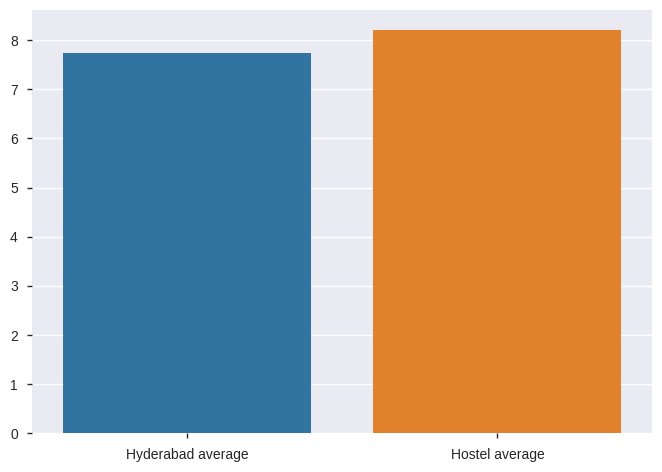

In [ ]:
#Visualizing the above data-frame using barplot
sns.barplot(data=hyd_hos_avg)

In [ ]:
#converting gender to numerical for checking cor-relation
data_dup['GENDER'].replace(['male','female'],[0,1],inplace=True)
data_dup


,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
0,1,20r21a6701,Aakash,csd,0,19,hyderabad,73,55,7.06,0.00,6.22,0.00,1
1,2,20r21a6702,Aashutosh,csd,0,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
2,3,20r21a6703,A.smrithika,csd,1,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0
3,4,20r21a6704,A.Rishikesh,csd,0,19,hostel,70,59,8.41,7.55,7.15,7.64,0
4,5,20r21a6705,A.Lakshmi Sruthi,csd,1,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0
5,6,20r21a6706,Anjali,csd,1,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0
6,7,20r21a6707,A.vijay,csd,0,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0
7,8,20r21a6708,B.manish,csd,0,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0
8,9,20r21a6709,B.pavithra,csd,1,19,hostel,76,59,8.18,7.45,7.39,7.64,0
9,10,20r21a6710,Bindu vasuki,csd,1,20,hostel,71,51,0.00,0.00,7.09,7.64,1


In [ ]:
data_dup['ADDRESS'].replace(['hyderabad','hostel'],[0,1],inplace=True)

In [ ]:
data_dup.corr()

,S_NO,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
S_NO,1.000000,0.083906,0.086169,0.114177,0.048948,0.037795,0.067926,0.150084,-0.094542,0.000640,-0.079478
GENDER,0.083906,1.000000,-0.242330,0.128406,0.123698,0.212609,0.194414,0.204710,0.210282,0.243843,-0.230664
AGE,0.086169,-0.242330,1.000000,0.101399,-0.017034,-0.180490,-0.186822,-0.112399,-0.056910,-0.057188,0.180016
ADDRESS,0.114177,0.128406,0.101399,1.000000,0.139018,0.163203,0.097504,0.121048,0.188259,0.177833,-0.195395
ATTENDANCE,0.048948,0.123698,-0.017034,0.139018,1.000000,0.750403,0.545637,0.508790,0.503548,0.475407,-0.755413
CREDITS,0.037795,0.212609,-0.180490,0.163203,0.750403,1.000000,0.705983,0.720414,0.699137,0.665398,-0.972684
SEM_1_GPA,0.067926,0.194414,-0.186822,0.097504,0.545637,0.705983,1.000000,0.687092,0.536786,0.511186,-0.593969
SEM_2_GPA,0.150084,0.204710,-0.112399,0.121048,0.508790,0.720414,0.687092,1.000000,0.661650,0.770449,-0.627265
SEM_3_GPA,-0.094542,0.210282,-0.056910,0.188259,0.503548,0.699137,0.536786,0.661650,1.000000,0.926452,-0.620511
CGPA,0.000640,0.243843,-0.057188,0.177833,0.475407,0.665398,0.511186,0.770449,0.926452,1.000000,-0.591778


In [ ]:
#Finding all male students 
data_gender_male=data[data['GENDER']=='male']
data_gender_male

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
0,1,20r21a6701,Aakash,csd,male,19,hyderabad,73,55,7.06,0.00,6.22,0.00,1
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0
10,11,20r21a6711,C.Tapan,csd,male,20,hostel,87,55,8.44,0.00,7.50,0.00,1
11,12,20r21a6712,D.Sarath,csd,male,20,hyderabad,57,27,0.00,0.00,0.00,0.00,8
12,13,20r21a6713,D.Bharath,csd,male,19,hyderabad,80,59,8.12,6.84,7.22,7.36,0
13,14,20r21a6714,D.Daniel,csd,male,19,hyderabad,78,49,7.00,0.00,0.00,0.00,3
14,15,20r21a6715,D.Vivek,csd,male,19,hyderabad,76,59,8.82,8.08,7.22,7.96,0


In [ ]:
#CHecking all the male students who are not having backlogs
data_gender_male=data_gender_male[data_gender_male['CGPA']>0.0]
data_gender_male

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0
12,13,20r21a6713,D.Bharath,csd,male,19,hyderabad,80,59,8.12,6.84,7.22,7.36,0
14,15,20r21a6715,D.Vivek,csd,male,19,hyderabad,76,59,8.82,8.08,7.22,7.96,0
15,16,20r21a6716,Eniya Darshini,csd,male,19,hyderabad,79,59,7.79,6.79,8.26,7.65,0
17,18,20r21a6718,G.Yashwanth,csd,male,19,hyderabad,81,59,8.62,7.58,7.91,8.02,0
23,24,20r21a6724,G.Karthekeya,csd,male,20,hostel,77,59,8.15,8.08,6.85,7.62,0
24,25,20r21a6725,Goutham.J,csd,male,19,hyderabad,85,59,8.00,7.50,7.96,7.82,0


In [ ]:
#Finding average of male students cgpa
data_gender_male.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



S_NO          29.4500
AGE           19.3500
ATTENDANCE    78.9000
CREDITS       59.0000
SEM_1_GPA      8.2040
SEM_2_GPA      7.5135
SEM_3_GPA      7.4230
CGPA           7.6745
BACKLOGS       0.0000
dtype: float64

In [ ]:
#Finding all the female students and ones who are having cgpa more than 0
data_gender_female=data[data['GENDER']=='female']
data_gender_female=data_gender_female[data_gender_female['CGPA']>0.0]
data_gender_female

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0
5,6,20r21a6706,Anjali,csd,female,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0
8,9,20r21a6709,B.pavithra,csd,female,19,hostel,76,59,8.18,7.45,7.39,7.64,0
9,10,20r21a6710,Bindu vasuki,csd,female,20,hostel,71,51,0.00,0.00,7.09,7.64,1
19,20,20r21a6720,G.Srujana,csd,female,19,hostel,68,59,9.18,8.79,8.61,8.83,0
20,21,20r21a6721,G.Vaishnavi,csd,female,20,hostel,88,59,9.12,9.11,9.30,9.19,0
21,22,20r21a6722,G.Deekshitha,csd,female,19,hyderabad,78,59,8.74,8.89,8.26,8.60,0
25,26,20r21a6726,G.Sanjana,csd,female,18,hyderabad,65,59,8.68,6.34,7.26,7.08,0
26,27,20r21a6727,G.Varshitha,csd,female,19,hyderabad,86,59,9.47,8.63,9.13,9.07,0


In [ ]:
#Checking female students average cgpa
data_gender_female['CGPA'].mean()

8.064545454545454

In [ ]:
data_gender_average=pd.DataFrame()
data_gender_average['Male']=[7.67]
data_gender_average['Female']=[8.06]
data_gender_average

,Male,Female
0,7.67,8.06


# **PREDICTION THE CGPA OF THE STUDENTS**

In [ ]:
#Creating new data-frame and storing all the required labels
x=pd.DataFrame()
x['ATTENDANCE']=data['ATTENDANCE']
x['CREDITS']=data['CREDITS']
x['SEM_1_GPA']=data['SEM_1_GPA']
x['SEM_2_GPA']=data['SEM_2_GPA']
x['SEM_3_GPA']=data['SEM_3_GPA']
x['BACLKOGS']=data['BACKLOGS']
x

,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,BACLKOGS
0,73,55,7.06,0.00,6.22,1
1,83,59,8.71,6.66,7.57,0
2,83,59,7.32,7.00,7.43,0
3,70,59,8.41,7.55,7.15,0
4,75,59,8.79,8.74,6.86,0
5,71,59,7.76,6.63,6.26,0
6,72,59,7.79,6.79,7.15,0
7,81,59,7.74,7.29,7.43,0
8,76,59,8.18,7.45,7.39,0
9,71,51,0.00,0.00,7.09,1


In [ ]:
#Storing the target variable
y=pd.DataFrame()
y['CGPA']=data['CGPA']
y

,CGPA
0,0.00
1,7.60
2,7.26
3,7.64
4,8.03
5,6.81
6,7.22
7,7.47
8,7.64
9,7.64


In [ ]:
#Splitting the data into train and test dataset
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=113)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(47, 6) (12, 6) (47, 1) (12, 1)


In [ ]:
#Running the linear-regression model
lgr=LinearRegression(fit_intercept=True)
lgr

LinearRegression()

In [ ]:
#Fitting the train_x and train_y data into the model for training purpose
data_fit=lgr.fit(train_x,train_y)
data_fit

LinearRegression()

In [ ]:
#Predicting the test dataset
data_predict=data_fit.predict(test_x)
data_predict

array([[ 7.26234628],
       [ 9.54019084],
       [ 6.77609369],
       [ 7.92339673],
       [ 0.78568693],
       [ 8.7119175 ],
       [-1.19900974],
       [ 7.62716564],
       [ 8.2719111 ],
       [ 7.01010057],
       [ 9.56559017],
       [ 7.76308594]])

In [ ]:
#storing the actual and predicted data values
difference=pd.DataFrame()
difference['actual']=test_y
difference['predicted']=data_predict
difference

,actual,predicted
14,7.96,7.262346
20,9.19,9.540191
6,7.22,6.776094
53,8.21,7.923397
57,0.00,0.785687
19,8.83,8.711918
27,0.00,-1.199010
52,8.19,7.627166
55,8.42,8.271911
3,7.64,7.010101


In [ ]:
#chECKING THE ACCURACY SCORE OF THE training MODEL
train_score=lgr.score(train_x,train_y)
train_score

0.9060153043886903

In [ ]:
#Checking the accuracy score of the test model
test_score=lgr.score(test_x,test_y)
test_score

0.9683561865183578

In [ ]:
Importing the libraries
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

In [ ]:
#Increasing the accruacy using ridge regression
ridreg=Ridge(alpha=20)
ridreg.fit(train_x,train_y)
ridreg

Ridge(alpha=20)

In [ ]:
#Checking the performance score
rid_train_score=ridreg.score(train_x,train_y)
rid_test_score=ridreg.score(test_x,test_y)
print(rid_train_score,rid_test_score)

0.902601495582411 0.9719616918601658


In [ ]:
#Increasing the accruacy using lasso regression
lasreg=Lasso(alpha=20)
lasreg.fit(train_x,train_y)
lasreg

Lasso(alpha=20)

In [ ]:
#Checking the performance score
las_train_score=lasreg.score(train_x,train_y)
las_test_score=lasreg.score(test_x,test_y)
print(las_train_score,las_test_score)

0.06876199775976866 -0.17071621373142376


In [ ]:
ridcv=RidgeCV(alphas=[0.001,0.01,0.1,1,10,100]).fit(train_x,train_y)

In [ ]:
ridcv_train_score=ridcv.score(train_x,train_y)
ridcv_test_score=ridcv.score(test_x,test_y)
print(ridcv_train_score,ridcv_test_score)

0.9045747880438955 0.9710631713327738


In [ ]:
#Checking the overall accuracy of the model for training data and test data using r2
r2_train_score=data_fit.score(train_x,train_y)
r2_test_score=data_fit.score(test_x,test_y)
print(r2_train_score,r2_test_score)

0.9060153043886903 0.9683561865183578


In [ ]:
#Checking root mean squared value for the model. It is less than 0.6, so the model is performing good
mean_squared=np.sqrt(mean_squared_error(test_y,data_predict))
print(mean_squared)

0.5585659055120457


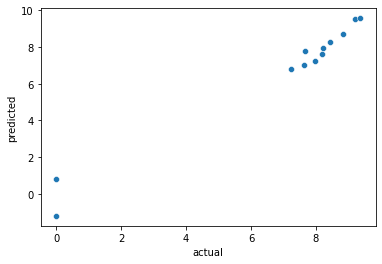

In [ ]:
#Scattering the data using scatter plot
sns.scatterplot(x=difference['actual'],y=difference['predicted'])

In [ ]:
data.describe(include='O')

,ROLL_NO,NAME,BRANCH,GENDER,ADDRESS
count,59,59,59,59,59
unique,59,59,1,2,2
top,20r21a6701,Aakash,csd,male,hyderabad
freq,1,1,59,32,43


In [ ]:
data.head()

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS
0,1,20r21a6701,Aakash,csd,male,19,hyderabad,73,55,7.06,0.00,6.22,0.00,1
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0


# **Performing Classification algorithm for predicting the data**

In [ ]:
def classify(n):
  if n > 8.2:
    return 'good cgpa'
  else:
    return 'lower cgpa'  

In [ ]:
data['classification']=data['CGPA'].apply(classify)
data

,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS,classification
0,1,20r21a6701,Aakash,csd,male,19,hyderabad,73,55,7.06,0.00,6.22,0.00,1,lower cgpa
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0,lower cgpa
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0,lower cgpa
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0,lower cgpa
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0,lower cgpa
5,6,20r21a6706,Anjali,csd,female,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0,lower cgpa
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0,lower cgpa
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0,lower cgpa
8,9,20r21a6709,B.pavithra,csd,female,19,hostel,76,59,8.18,7.45,7.39,7.64,0,lower cgpa
9,10,20r21a6710,Bindu vasuki,csd,female,20,hostel,71,51,0.00,0.00,7.09,7.64,1,lower cgpa


In [ ]:
#Converting the classifiaction column into integer
data['classification'].replace(['good cgpa','lower cgpa'],[0,1],inplace=True)
data


,S_NO,ROLL_NO,NAME,BRANCH,GENDER,AGE,ADDRESS,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,CGPA,BACKLOGS,classification
0,1,20r21a6701,Aakash,csd,male,19,hyderabad,73,55,7.06,0.00,6.22,0.00,1,1
1,2,20r21a6702,Aashutosh,csd,male,19,hyderabad,83,59,8.71,6.66,7.57,7.60,0,1
2,3,20r21a6703,A.smrithika,csd,female,19,hyderabad,83,59,7.32,7.00,7.43,7.26,0,1
3,4,20r21a6704,A.Rishikesh,csd,male,19,hostel,70,59,8.41,7.55,7.15,7.64,0,1
4,5,20r21a6705,A.Lakshmi Sruthi,csd,female,19,hyderabad,75,59,8.79,8.74,6.86,8.03,0,1
5,6,20r21a6706,Anjali,csd,female,19,hyderabad,71,59,7.76,6.63,6.26,6.81,0,1
6,7,20r21a6707,A.vijay,csd,male,19,hyderabad,72,59,7.79,6.79,7.15,7.22,0,1
7,8,20r21a6708,B.manish,csd,male,19,hyderabad,81,59,7.74,7.29,7.43,7.47,0,1
8,9,20r21a6709,B.pavithra,csd,female,19,hostel,76,59,8.18,7.45,7.39,7.64,0,1
9,10,20r21a6710,Bindu vasuki,csd,female,20,hostel,71,51,0.00,0.00,7.09,7.64,1,1


In [ ]:
x1=x

In [ ]:
x1['CGPA']=data['CGPA']
x1

,ATTENDANCE,CREDITS,SEM_1_GPA,SEM_2_GPA,SEM_3_GPA,BACLKOGS,CGPA
0,73,55,7.06,0.00,6.22,1,0.00
1,83,59,8.71,6.66,7.57,0,7.60
2,83,59,7.32,7.00,7.43,0,7.26
3,70,59,8.41,7.55,7.15,0,7.64
4,75,59,8.79,8.74,6.86,0,8.03
5,71,59,7.76,6.63,6.26,0,6.81
6,72,59,7.79,6.79,7.15,0,7.22
7,81,59,7.74,7.29,7.43,0,7.47
8,76,59,8.18,7.45,7.39,0,7.64
9,71,51,0.00,0.00,7.09,1,7.64


In [ ]:
y1=pd.DataFrame()
y1['classification']=data['classification']
y1

,classification
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=0.2,random_state=111)
print("train x1 is",train_x1.shape)
print("test x1 is",test_x1.shape)
print("train y1 is",train_y1.shape)
print("test y1 is",test_y1.shape)

In [ ]:
logis=LogisticRegression(fit_intercept=True)

In [ ]:
data_predict=logis.fit(train_x1,train_y1)

In [ ]:
def d_predict(x,y):

  predict=data_predict.predict(x)
  

  test_score1=logis.score(x,y)

  return predict,test_score1

In [ ]:
score=d_predict(test_x1,test_y1)
print(score)

(array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]), 1.0)


In [ ]:
difference=pd.DataFrame()
difference['actual']=test_y1
difference['predicted']=predict
difference

,actual,predicted
0,1,1
17,1,1
26,0,0
51,1,1
32,1,1
16,1,1
42,0,0
35,0,0
33,1,1
38,1,1


In [ ]:
train_score1=logis.score(train_x1,train_y1)
test_score1=logis.score(test_x1,test_y1)
print(train_score1,test_score1)

0.9574468085106383 1.0


In [ ]:
#confusion_matrix=confusion_matrix(test_x1,test_y1)
#confusion_matrix